In [14]:
import pandas as pd
import numpy as np

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
import scipy.stats as stats

In [19]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [23]:
df.fillna(df['Age'].mean(),inplace=True)

In [24]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [25]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [27]:
x = df.iloc[:,1:3]
x.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [28]:
y = df['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [29]:
x_train , x_test , y_train , y_test = train_test_split( x , y , test_size = 0.2 , random_state = 40)

<ipython-input-33-1c1b952eb00b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'])


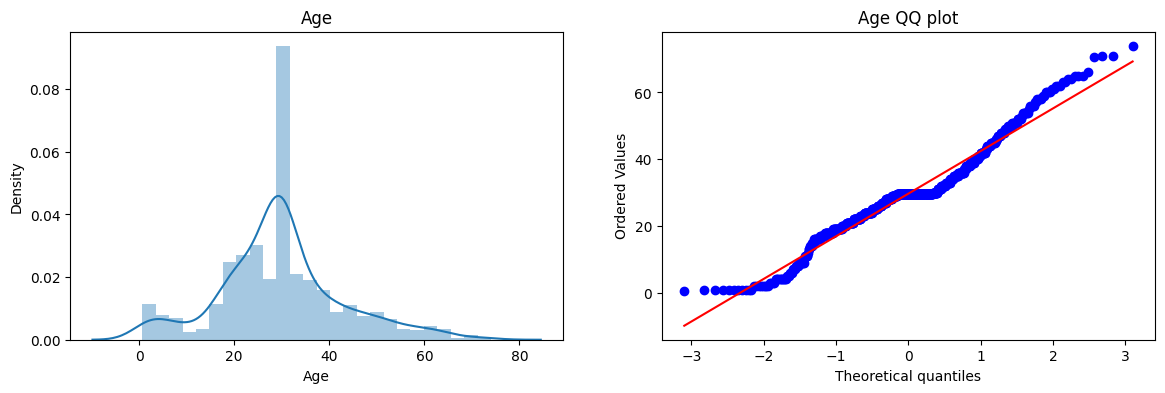

In [33]:
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.distplot(x_train['Age'])
plt.title("Age")

plt.subplot(122)
stats.probplot(x_train['Age'],dist='norm',plot=plt)
plt.title('Age QQ plot')

plt.show()

In [35]:
lr = LogisticRegression()
dtc = DecisionTreeClassifier()

In [36]:
lr.fit(x_train,y_train)
dtc.fit(x_train,y_train)

y_pred = lr.predict(x_test)
y_pred1 = dtc.predict(x_test)

print("Accuracy Score by Logistic Regression:",accuracy_score(y_test,y_pred))
print("Accuracy Score by DTR:",accuracy_score(y_test,y_pred1))

Accuracy Score by Logistic Regression: 0.6536312849162011
Accuracy Score by DTR: 0.6480446927374302


In [37]:
trf = FunctionTransformer(func=np.log1p)

In [38]:
x_train_transformed = trf.fit_transform(x_train)
x_test_transformed = trf.fit_transform(x_test)

In [39]:
lr2 = LogisticRegression()
dtc2 = DecisionTreeClassifier()

In [42]:
lr2.fit(x_train_transformed,y_train)
dtc2.fit(x_train_transformed,y_train)

y_pred2 = lr2.predict(x_test_transformed)
y_pred3 = dtc2.predict(x_test_transformed)

print("Accuracy Score by Logistic Regression:",accuracy_score(y_test,y_pred2))
print("Accuracy Score by DTR:",accuracy_score(y_test,y_pred3))

Accuracy Score by Logistic Regression: 0.6983240223463687
Accuracy Score by DTR: 0.6256983240223464


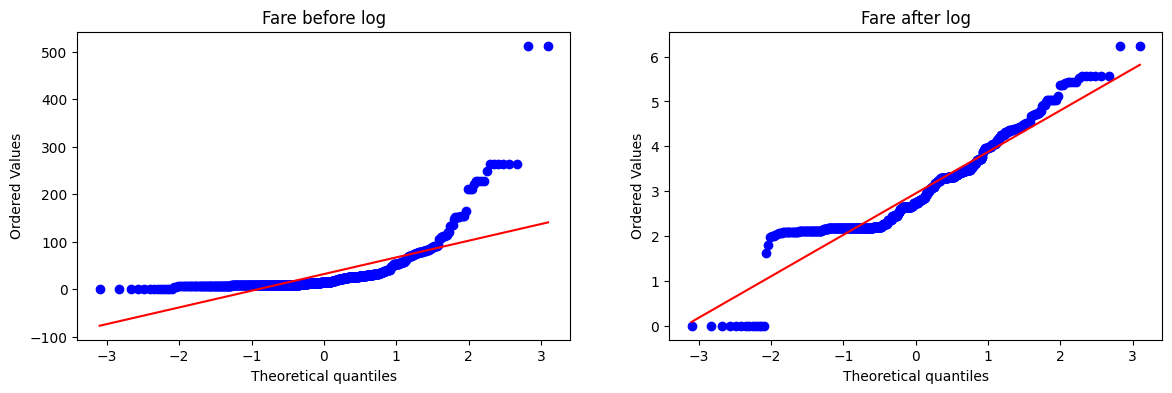

In [43]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train['Fare'],dist="norm",plot=plt)
plt.title("Fare before log")

plt.subplot(122)
stats.probplot(x_train_transformed['Fare'],dist='norm',plot=plt)
plt.title('Fare after log')

plt.show()

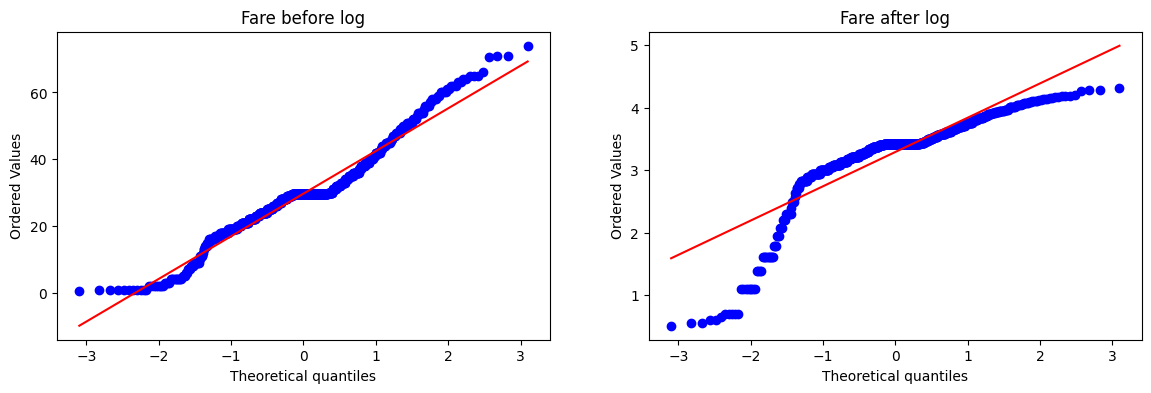

In [44]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train['Age'],dist="norm",plot=plt)
plt.title("Age before log")

plt.subplot(122)
stats.probplot(x_train_transformed['Age'],dist='norm',plot=plt)
plt.title('Age after log')

plt.show()

In [45]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

x_train_transformed2 = trf2.fit_transform(x_train)
x_test_transformed2 = trf2.fit_transform(x_test)

In [46]:
lr3 = LogisticRegression()
dtc3 = DecisionTreeClassifier()

In [47]:
lr3.fit(x_train_transformed2,y_train)
dtc3.fit(x_train_transformed2,y_train)

y_pred4 = lr3.predict(x_test_transformed2)
y_pred5 = dtc3.predict(x_test_transformed2)

print("Accuracy Score by Logistic Regression:",accuracy_score(y_test,y_pred4))
print("Accuracy Score by DTR:",accuracy_score(y_test,y_pred5))

Accuracy Score by Logistic Regression: 0.6759776536312849
Accuracy Score by DTR: 0.6536312849162011
